In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import math
from datetime import datetime

In [177]:
import sys, os
script_dir = sys.path[0]
print(script_dir)

DATA_PATH = os.path.join(script_dir+r'\train\train\7554\SimpleTest')
print(DATA_PATH)

D:\Data_science_project\Project\data visualization project\pandas project
D:\Data_science_project\Project\data visualization project\pandas project\train\train\7554\SimpleTest


# Preprocessing

In [3]:
for d in [d for d in os.listdir(script_dir+r'\train\train') if not d.startswith('.')]:
    d_path = os.path.join(script_dir+r'\train\train\{}\SimpleTest')
    for f in os.listdir(d_path.format(d)):
        if(f.endswith('.csv') and not f.startswith('Test Time Log')):
            f_path = d_path.format(d)
            data = pd.read_csv(f_path + '/' + f)
            data['Color'] = 0
            data.dropna(axis = 0, inplace = True)
            data = data.astype({'X' : float})
            data.rename(columns = {" Y" : "Y", 
                                    " Pressure" : "Pressure", 
                                    " TiltX" : "TiltX", 
                                    " TiltY" : "TiltY", 
                                    " Time" : "Time"}, inplace = True)
            data['Time']=data['Time'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))
            data.to_csv(f_path + '/' + f, index=False)

# Coding time

In [197]:
def plot_images(path, mode):
    counter = 0
    for f in os.listdir(path):
        file_path = os.path.join(path+'\\'+f)
        if(f.split(".")[1] == "csv" and f != "Test Time Log.csv"):
            counter += 1
                
    fig, ax = plt.subplots(counter,2)
    fig.set_figheight(150)
    fig.set_figwidth(15)
    index = 0
    
    print("Plotting {0} images".format(counter))
    for f in os.listdir(path):
        file_path = os.path.join(path+'\\'+f)
        if(f.split(".")[1] == "csv" and f != "Test Time Log.csv"):
            data = pd.read_csv(file_path)
            
            #Plot picture
            ax[index,0].scatter(data['X'], data['Y'])
            ax[index,0].set_title(f + " (Image)")
            ax[index,0].set_xlabel('X')
            ax[index,0].set_ylabel('Y')
            ax[index,0].set_xlim(data['X'].min()-50, data['X'].max()+50)
            ax[index,0].set_ylim(data['Y'].min()-50, data['Y'].max()+100)
            ax[index,0].invert_yaxis()
            
            if mode == 1: # Sublot colors
                ndata = data[data['Color'] != 0]
                ax[index,1].scatter(x=ndata['X'], y=ndata['Y'], c=ndata['Color'], cmap='gist_rainbow')
                ax[index,1].set_title(f + " (Image Colored lines)")
                ax[index,1].set_xlabel('X')
                ax[index,1].set_ylabel('Y')
                ax[index,1].set_xlim(data['X'].min()-50, data['X'].max()+50)
                ax[index,1].set_ylim(data['Y'].min()-50, data['Y'].max()+100)
                ax[index,1].invert_yaxis()
            
            if mode == 2: # Sublot pressure
                ax[index,1].plot(data.index, data['Pressure'])
                ax[index,1].set_title(f + " (Pressure)")
                ax[index,1].set_ylabel('Pressure')
                
            if mode == 3: # Sublot time
                ax[index,1].plot(data.index, data['Time'])
                ax[index,1].set_title(f + " (Time)")
                ax[index,1].set_ylabel('Time')
                
            index += 1

## Calculating number of lines

In [181]:
def calc_lines2(path, time_epsilo, length_epsilo):
    result = {}
    for f in os.listdir(path):
        file_path = os.path.join(path+'\\'+f)
        if(f.endswith(".csv") and f != "Test Time Log.csv"):
            
            data = pd.read_csv(file_path)
            colors = np.zeros((data['Color'].size,), dtype=int)
            line_count = 1
            length = 0
            line_start = 0
            pressure_sum = 0
            lines = {}
            
            for index in (data.index[:-1]):
                if(data["Time"][index+1] - data["Time"][index] > time_epsilo):
                    if(length > length_epsilo):
                        for i in range(line_start, index+1):
                            colors[i] = line_count
                        lines[line_count] = (length, pressure_sum/(index+1-line_start))
                        line_count += 1
                    line_start = index+1
                    length = 0
                    pressure_sum = 0
                else:
                    pressure_sum += data['Pressure'][index]
                    length += math.sqrt(math.pow(data["X"][index] - data["X"][index+1],2) + math.pow(data["Y"][index] - data["Y"][index+1],2))
            
            if(length > length_epsilo): # check last line
                for i in range(line_start, index+2):
                    colors[i] = line_count
                lines[line_count] = (length, pressure_sum/(index+1-line_start))
                
            if(np.all((colors==0))):
                line_count = 0
            data['Color'] = colors
            
            data.to_csv(file_path, index=False)
            result[f.split(".")[0]] = lines
            
    return result

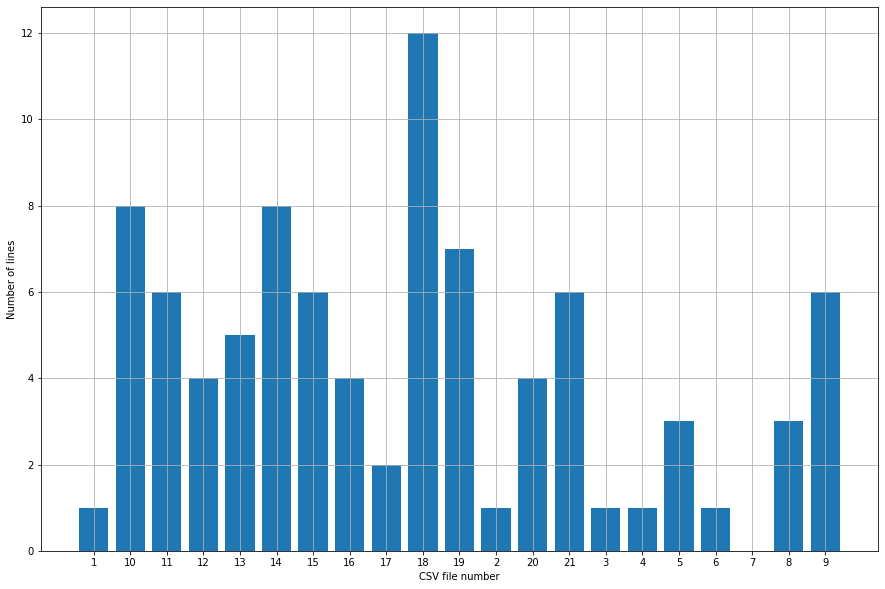

In [212]:
result = calc_lines2(DATA_PATH, 0.1, 20)
    
plt.figure(figsize=(15,10))
plt.bar(range(len(result)), [len(result[i]) for i in result], align='center')
plt.xlabel("CSV file number")
plt.ylabel("Number of lines")
plt.xticks(range(len(result)), list(result.keys()))
plt.grid()

Plotting 21 images


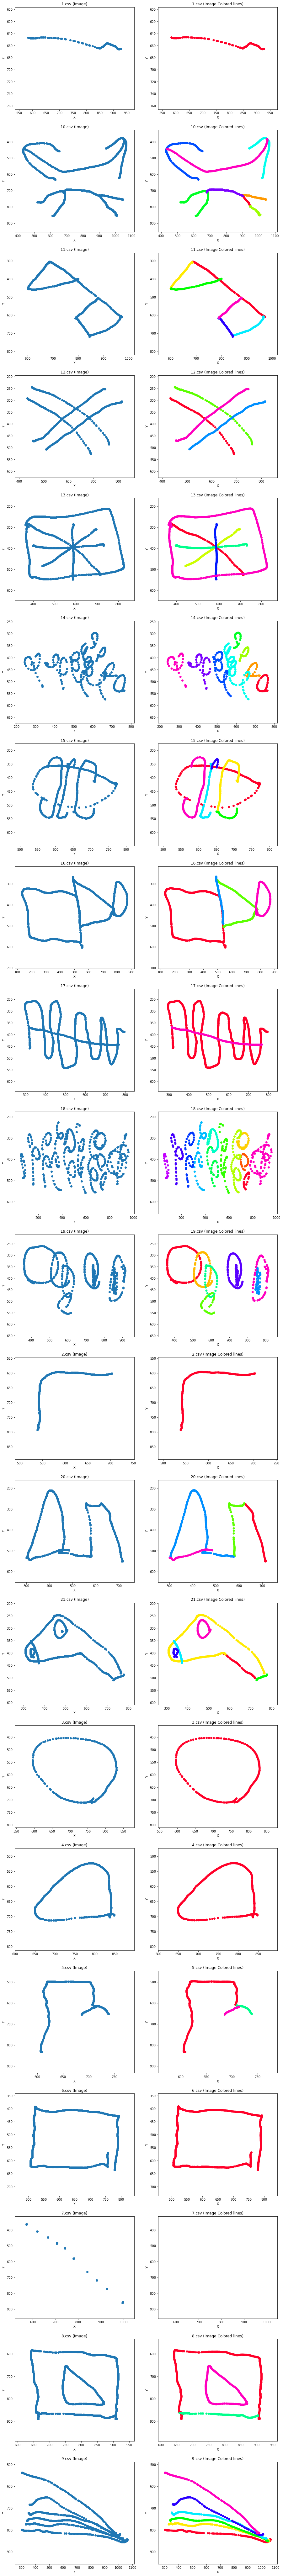

In [183]:
plot_images(DATA_PATH, 1)

## Calculating average pressure and length of each line

In [184]:
pprint.pprint(result)

{'1': {1: (348.3800846405598, 0.32978276351026)},
 '10': {1: (86.31839261441554, 0.46655658774432684),
        2: (141.96585388703483, 0.5621053665709584),
        3: (94.73212249192078, 0.44241949113515705),
        4: (366.34349213135675, 0.6936310294100589),
        5: (382.9652174141985, 0.5734594537469442),
        6: (539.8334648810376, 0.5737738920515086),
        7: (238.34667076000363, 0.5146888447040953),
        8: (747.0656060980165, 0.5072025221526919)},
 '11': {1: (425.1576787062612, 0.7959350810702799),
        2: (178.01913602595496, 0.5186523473925061),
        3: (215.40694959336153, 0.6828465638299511),
        4: (170.94569893035887, 0.5693295284154567),
        5: (120.437615634233, 0.5803138072694745),
        6: (144.26342111439192, 0.6658385200708201)},
 '12': {1: (355.8255553197163, 0.44142707939381187),
        2: (408.2033248556494, 0.491879874871949),
        3: (372.0038716730489, 0.6501070027489487),
        4: (373.34618483486906, 0.6304473699021497)},
 '

## Calculating pen raises

In [108]:
def calc_pen_raises_time(path, time_epsilo):
    result = {}
    for f in os.listdir(path):
        file_path = os.path.join(path+'\\'+f)
        if(f.split(".")[1] == "csv" and f != "Test Time Log.csv"):
            data = pd.read_csv(file_path)
            lift_count = 0
            for index in (data.index[:-1]):
                if(data["Time"][index+1] - data["Time"][index] > time_epsilo):
                    lift_count += 1
            result[f.split(".")[0]] = lift_count
            
    plt.figure(figsize=(15,10))
    plt.bar(range(len(result)), list(result.values()), align='center')
    plt.xlabel("CSV file number")
    plt.ylabel("Number of pen raises")
    plt.grid()
    plt.xticks(range(len(result)), list(result.keys()))

Plotting 21 images


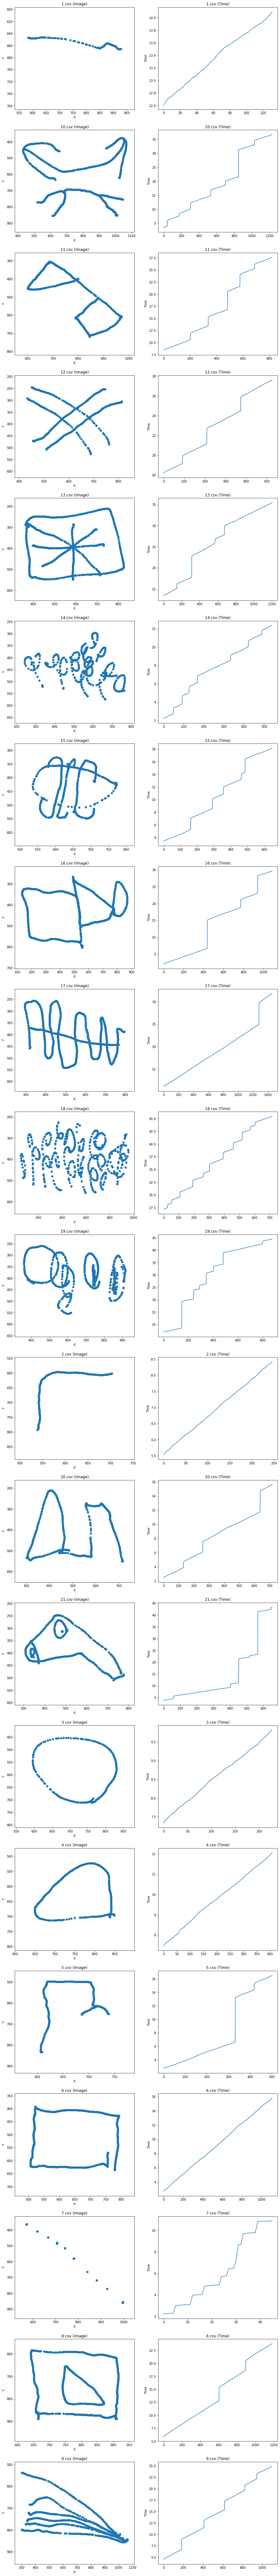

In [115]:
plot_images(DATA_PATH, 3)

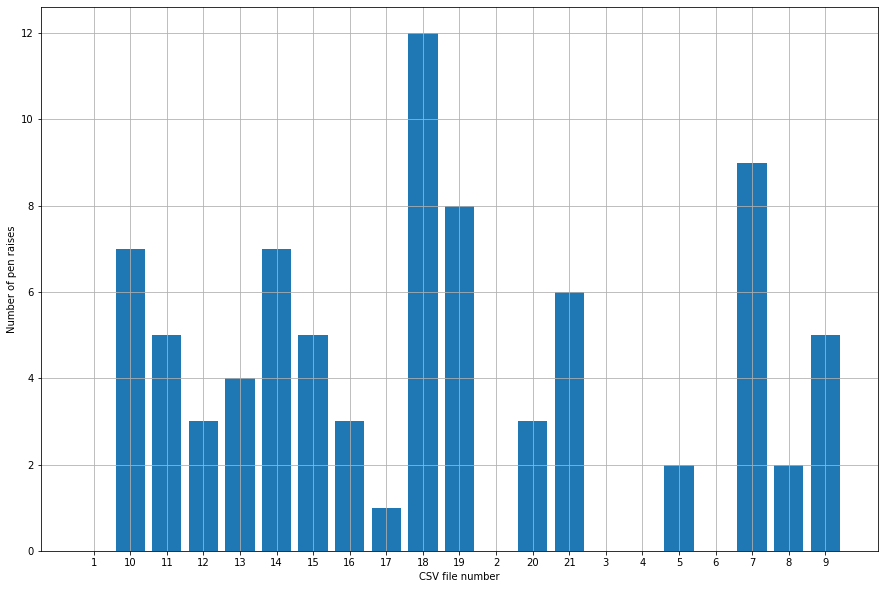

In [116]:
calc_pen_raises(DATA_PATH, 0.1)